In [1]:
#setting seed for reproducibility
import random; random.seed(53)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [2]:
import pandas as pd

# Loading data
tweet_df = pd.read_csv("datasets/tweets.csv")

# Creating target
y = tweet_df['author']

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'],y,test_size=0.33,random_state=53)


In [3]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05,max_df=0.9)

# Creating count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initializing tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",min_df=0.05,max_df=0.9)

# Creating tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [9]:
# Creatig a MulitnomialNB model
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train,y_train)



#Predicting TF-IDF test data to get predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculating the accuracy of predictions
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred,y_test)

# Creating a MulitnomialNB model
count_nb = MultinomialNB()

#model training
count_nb.fit(count_train,y_train)

#Predicting count test data to get predictions
count_nb_pred = count_nb.predict(count_test)

# Calculating the accuracy of predictions
count_nb_score = metrics.accuracy_score(count_nb_pred,y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.803030303030303
NaiveBayes Count Score:  0.7954545454545454


Confusion matrix, without normalization
Confusion matrix, without normalization


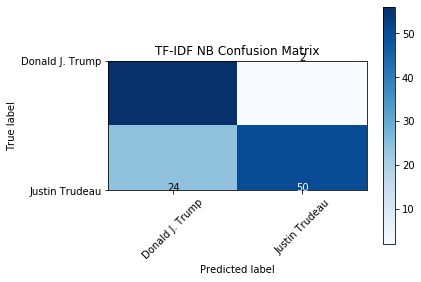

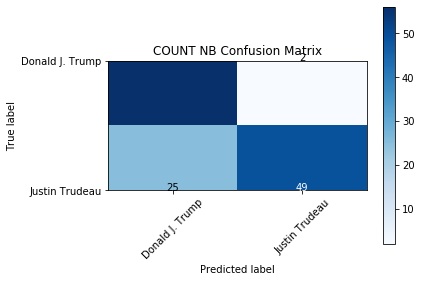

In [10]:
%matplotlib inline

from datasets.helper_functions import plot_confusion_matrix

# Calculating the confusion matrices for the tfidf_nb model and count_nb models
tfidf_nb_cm = metrics.confusion_matrix(y_test,tfidf_nb_pred,labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test,count_nb_pred,labels=['Donald J. Trump', 'Justin Trudeau'])

# Plotting the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

# Plotting the count_nb_cm confusion matrix without overwriting the first plot 
plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="COUNT NB Confusion Matrix", figure=1)

LinearSVC Score:   0.841
Confusion matrix, without normalization


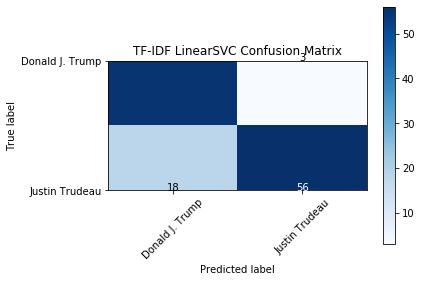

In [11]:
# Creating a LinearSVM model
tfidf_svc = LinearSVC()

#Training the model
tfidf_svc.fit(tfidf_train,y_train)

#Predicting tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculating accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred,y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculating the confusion matrices for the tfidf_svc model
svc_cm = metrics.confusion_matrix(y_test,tfidf_svc_pred,labels=['Donald J. Trump', 'Justin Trudeau'])

# Plotting the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

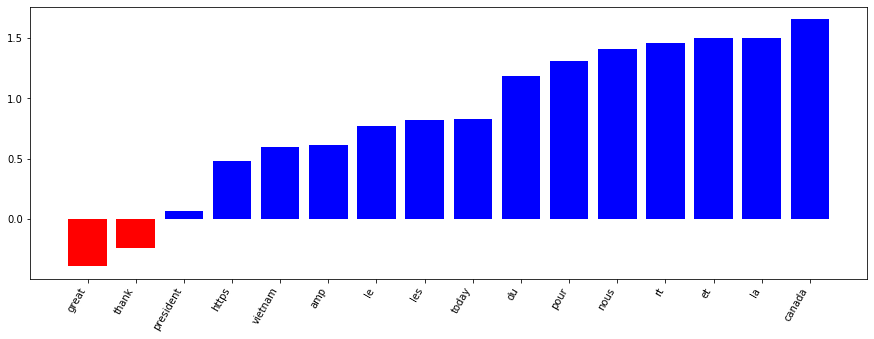

[(-0.39598206229430233, 'great'),
 (-0.24645206410027276, 'thank'),
 (0.06258448826413367, 'president'),
 (0.48212959264446, 'https'),
 (0.596051937903573, 'vietnam'),
 (0.6155605142874472, 'amp'),
 (0.7725844535058338, 'le'),
 (0.8213790774924419, 'les'),
 (0.8286609808290165, 'today'),
 (1.1869092498809244, 'du'),
 (1.3143536177225061, 'pour'),
 (1.4122583705787974, 'nous'),
 (1.4612711602931312, 'rt'),
 (1.4991823831973714, 'et'),
 (1.5056462334388578, 'la'),
 (1.6567982426501913, 'canada')]


In [12]:
from datasets.helper_functions import plot_and_return_top_features

# Importing pprint from pprint
from pprint import pprint

# Getting the top features using the plot_and_return_top_features function and your top model and tfidf vectorizer
top_features = plot_and_return_top_features(tfidf_svc,tfidf_vectorizer)

# pprinting the top features
pprint(top_features)

In [13]:
# Writting two tweets as strings, one which you want to classify as Trump and one as Trudeau
trump_tweet = 'Ruin China'
trudeau_tweet = 'Support US'

# Vectorizing each tweet using the TF-IDF vectorizer's transform method
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Calling the predict method on your vectorized tweets
trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized )
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Donald J. Trump']
Predicted Trudeau tweet ['Donald J. Trump']
